## This Colab notebook contains the code to assess the agreement between human experts and LLMs in evaluating argument quality. Specifically, it calculates Pearson and Spearman correlations between the scores assigned by four human experts and those assigned by three language models: Gemma 3, LLaMA, and DeepSeek.
### By: Gabriela A. Díaz

The file 36scores_dirty_experts&models.csv contains the scores assigned to 36 arguments. For the DeepSeek and LLaMA models, some scores are set to 0, indicating cases where the LLM failed to evaluate the argument. 



In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('36scores_dirty_experts&models.csv')

In [43]:
df

,document_id,expert1,expert2,expert3,expert4,gemma3,deepseek,llama
0,1,4,4,5,5,4,5,5
1,2,2,2,2,4,4,4,4
2,3,5,4,5,3,4,4,4
3,4,2,2,2,5,3,5,3
4,5,3,4,2,4,4,5,5
5,6,5,5,4,5,4,4,4
6,7,4,3,4,5,5,4,0
7,8,5,4,5,5,5,5,0
8,9,4,4,1,1,2,5,5
9,10,5,2,5,5,4,4,4


In [44]:
import itertools

# Tus columnas de interés
columnas = ['expert1', 'expert2', 'expert3', 'expert4', 'gemma3', 'deepseek', 'llama']

# Generar todas las combinaciones de pares
# El número '2' en combinations(columnas, 2) indica que queremos pares (grupos de 2)
pares_generados = list(itertools.combinations(columnas, 2))


In [45]:
pares_generados

[('expert1', 'expert2'),
 ('expert1', 'expert3'),
 ('expert1', 'expert4'),
 ('expert1', 'gemma3'),
 ('expert1', 'deepseek'),
 ('expert1', 'llama'),
 ('expert2', 'expert3'),
 ('expert2', 'expert4'),
 ('expert2', 'gemma3'),
 ('expert2', 'deepseek'),
 ('expert2', 'llama'),
 ('expert3', 'expert4'),
 ('expert3', 'gemma3'),
 ('expert3', 'deepseek'),
 ('expert3', 'llama'),
 ('expert4', 'gemma3'),
 ('expert4', 'deepseek'),
 ('expert4', 'llama'),
 ('gemma3', 'deepseek'),
 ('gemma3', 'llama'),
 ('deepseek', 'llama')]

In [46]:

# Define columns
pares_columnas = pares_generados

# --- Prepare lists to hold results ---
resultados_pearson = []
resultados_spearman = []

# --- Calculate y store correlation Pearson ---
print("--- Correlation Pearson ---")
for col1, col2 in pares_columnas:
    if col1 in df.columns and col2 in df.columns:
        corr_pearson, p_value_pearson = pearsonr(df[col1], df[col2])
        resultados_pearson.append({
            'Columns': f'{col1} vs {col2}',
            'Coeficient Pearson (r)': corr_pearson,
            'P-valorue Pearson': p_value_pearson
        })
        print(f"Calculating Pearson for column {col1} vs {col2}")
    else:
        print(f"Warning (Pearson): One or more columns '{col1}', '{col2}' are not in the DataFrame.")


df_pearson_resultados = pd.DataFrame(resultados_pearson)

print("\n" + "="*50 + "\n")

# --- Calculate y store correlation Spearman ---
print("--- Calculating correlation Spearman ---")
for col1, col2 in pares_columnas:
    if col1 in df.columns and col2 in df.columns:
        corr_spearman, p_value_spearman = spearmanr(df[col1], df[col2])
        resultados_spearman.append({
            'Columns': f'{col1} vs {col2}',
            'Coeficient Spearman (ρ)': corr_spearman,
            'P-value Spearman': p_value_spearman
        })
        print(f"Calculating Spearman for {col1} vs {col2}")
    else:
        print(f"Warining (Spearman): One or more columns '{col1}', '{col2}' missing in the DataFrame.")

# Convertir la lista de diccionarios en un DataFrame
df_spearman_resultados = pd.DataFrame(resultados_spearman)

print("\n" + "="*50 + "\n")

# --- Mostrar los DataFrames de resultados ---
print("--- Results Pearson ---")
print(df_pearson_resultados)

print("\n" + "="*50 + "\n")

print("--- Results Spearman ---")
print(df_spearman_resultados)

print("\n" + "="*50 + "\n")

# Opcional: Guardar los DataFrames a CSV
df_pearson_resultados.to_csv('resultados_correlacion_pearson.csv', index=False)
df_spearman_resultados.to_csv('resultados_correlacion_spearman.csv', index=False)
print("Results Pearson saved in 'resultados_correlacion_pearson.csv'")
print("Results Spearman saved in 'resultados_correlacion_spearman.csv'")

--- Correlation Pearson ---
Calculating Pearson for column expert1 vs expert2
Calculating Pearson for column expert1 vs expert3
Calculating Pearson for column expert1 vs expert4
Calculating Pearson for column expert1 vs gemma3
Calculating Pearson for column expert1 vs deepseek
Calculating Pearson for column expert1 vs llama
Calculating Pearson for column expert2 vs expert3
Calculating Pearson for column expert2 vs expert4
Calculating Pearson for column expert2 vs gemma3
Calculating Pearson for column expert2 vs deepseek
Calculating Pearson for column expert2 vs llama
Calculating Pearson for column expert3 vs expert4
Calculating Pearson for column expert3 vs gemma3
Calculating Pearson for column expert3 vs deepseek
Calculating Pearson for column expert3 vs llama
Calculating Pearson for column expert4 vs gemma3
Calculating Pearson for column expert4 vs deepseek
Calculating Pearson for column expert4 vs llama
Calculating Pearson for column gemma3 vs deepseek
Calculating Pearson for column

In [47]:
# Opcional: Guardar los DataFrames a CSV
df_pearson_resultados.to_csv('resultados_correlacion_pearson_dirty.csv', index=False)
df_spearman_resultados.to_csv('resultados_correlacion_spearman_dirty.csv', index=False)
print("Resultados de Pearson guardados en 'resultados_correlacion_pearson_dirty.csv'")
print("Resultados de Spearman guardados en 'resultados_correlacion_spearman_dirty.csv'")

Resultados de Pearson guardados en 'resultados_correlacion_pearson_dirty.csv'
Resultados de Spearman guardados en 'resultados_correlacion_spearman_dirty.csv'


In [48]:
df2 = df[df['llama'] != 0]   #remove rows that fail when scoring.

In [49]:
calc_correlations(df2,"26scores")

--- Calculando Correlación de Pearson ---
Calculado Pearson para expert1 vs expert2
Calculado Pearson para expert1 vs expert3
Calculado Pearson para expert1 vs expert4
Calculado Pearson para expert1 vs gemma3
Calculado Pearson para expert1 vs deepseek
Calculado Pearson para expert1 vs llama
Calculado Pearson para expert2 vs expert3
Calculado Pearson para expert2 vs expert4
Calculado Pearson para expert2 vs gemma3
Calculado Pearson para expert2 vs deepseek
Calculado Pearson para expert2 vs llama
Calculado Pearson para expert3 vs expert4
Calculado Pearson para expert3 vs gemma3
Calculado Pearson para expert3 vs deepseek
Calculado Pearson para expert3 vs llama
Calculado Pearson para expert4 vs gemma3
Calculado Pearson para expert4 vs deepseek
Calculado Pearson para expert4 vs llama
Calculado Pearson para gemma3 vs deepseek
Calculado Pearson para gemma3 vs llama
Calculado Pearson para deepseek vs llama


--- Calculando Correlación de Spearman ---
Calculado Spearman para expert1 vs expert2


In [50]:

# Definir los pares de columnas que queremos correlacionar
pares_columnas = pares_generados

def calc_correlations(df,filename): 
    # --- Preparar listas para almacenar los resultados ---
    resultados_pearson = []
    resultados_spearman = []

    # --- Calcular y almacenar correlaciones de Pearson ---
    print("--- Calculando Correlación de Pearson ---")
    for col1, col2 in pares_columnas:
        if col1 in df.columns and col2 in df.columns:
            corr_pearson, p_value_pearson = pearsonr(df[col1], df[col2])
            resultados_pearson.append({
                'Par de Columnas': f'{col1} vs {col2}',
                'Coeficiente Pearson (r)': corr_pearson,
                'P-valor Pearson': p_value_pearson
            })
            print(f"Calculado Pearson para {col1} vs {col2}")
        else:
            print(f"Advertencia (Pearson): Una o ambas columnas '{col1}', '{col2}' no se encontraron en el DataFrame.")

    # Convertir la lista de diccionarios en un DataFrame
    df_pearson_resultados = pd.DataFrame(resultados_pearson)

    print("\n" + "="*50 + "\n")

    # --- Calcular y almacenar correlaciones de Spearman ---
    print("--- Calculando Correlación de Spearman ---")
    for col1, col2 in pares_columnas:
        if col1 in df.columns and col2 in df.columns:
            corr_spearman, p_value_spearman = spearmanr(df[col1], df[col2])
            resultados_spearman.append({
                'Par de Columnas': f'{col1} vs {col2}',
                'Coeficiente Spearman (ρ)': corr_spearman,
                'P-valor Spearman': p_value_spearman
            })
            print(f"Calculado Spearman para {col1} vs {col2}")
        else:
            print(f"Advertencia (Spearman): Una o ambas columnas '{col1}', '{col2}' no se encontraron en el DataFrame.")

    # Convertir la lista de diccionarios en un DataFrame
    df_spearman_resultados = pd.DataFrame(resultados_spearman)

    print("\n" + "="*50 + "\n")

    # --- Mostrar los DataFrames de resultados ---
    print("--- Resultados de Correlación de Pearson ---")
    print(df_pearson_resultados)

    print("\n" + "="*50 + "\n")

    print("--- Resultados de Correlación de Spearman ---")
    print(df_spearman_resultados)

    print("\n" + "="*50 + "\n")

    # Opcional: Guardar los DataFrames a CSV
    df_pearson_resultados.to_csv('resultados_correlacion' + filename + '_pearson.csv', index=False)
    df_spearman_resultados.to_csv('resultados_correlacion' + filename + '_spearman.csv', index=False)
    print("Resultados de Pearson guardados en 'resultados_correlacion" + filename + "_pearson.csv'")
    print("Resultados de Spearman guardados en 'resultados_correlacion" + filename + "_spearman.csv'")
    

## Visualization

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr, spearmanr, kendalltau # Import kendalltau

In [52]:
calc_correlations(df2,"26scores")

--- Calculando Correlación de Pearson ---
Calculado Pearson para expert1 vs expert2
Calculado Pearson para expert1 vs expert3
Calculado Pearson para expert1 vs expert4
Calculado Pearson para expert1 vs gemma3
Calculado Pearson para expert1 vs deepseek
Calculado Pearson para expert1 vs llama
Calculado Pearson para expert2 vs expert3
Calculado Pearson para expert2 vs expert4
Calculado Pearson para expert2 vs gemma3
Calculado Pearson para expert2 vs deepseek
Calculado Pearson para expert2 vs llama
Calculado Pearson para expert3 vs expert4
Calculado Pearson para expert3 vs gemma3
Calculado Pearson para expert3 vs deepseek
Calculado Pearson para expert3 vs llama
Calculado Pearson para expert4 vs gemma3
Calculado Pearson para expert4 vs deepseek
Calculado Pearson para expert4 vs llama
Calculado Pearson para gemma3 vs deepseek
Calculado Pearson para gemma3 vs llama
Calculado Pearson para deepseek vs llama


--- Calculando Correlación de Spearman ---
Calculado Spearman para expert1 vs expert2


In [53]:

def correlations_heatmap(df,filename):

    # Define the columns of interest
    columns_of_interest = ['expert1', 'expert2', 'expert3', 'expert4', 'gemma3', 'deepseek', 'llama']

    # Ensure the DataFrame only contains the columns of interest
    df_selected = df[columns_of_interest]

    print("--- Selected DataFrame Columns (head)---")
    print(df_selected.head())
    print("\n" + "="*50 + "\n")

    # Calculate correlation matrices directly using pandas .corr() method
    # This is efficient for generating full correlation matrices.

    pearson_matrix = df_selected.corr(method='pearson')
    spearman_matrix = df_selected.corr(method='spearman')
    kendall_matrix = df_selected.corr(method='kendall') # Calculate Kendall's Tau matrix

    print("--- Pearson Correlation Matrix ---")
    print(pearson_matrix)
    print("\n" + "="*50 + "\n")

    print("--- Spearman Correlation Matrix ---")
    print(spearman_matrix)
    print("\n" + "="*50 + "\n")

    print("--- Kendall's Tau Correlation Matrix ---")
    print(kendall_matrix)
    print("\n" + "="*50 + "\n")


    # Visualize the correlation matrices as heatmaps

    # Plotting configuration
   # plt.style.use('seaborn-v0_8-darkgrid') # Visual style
    plt.style.use('seaborn-white')
    plt.rcParams['figure.figsize'] = (10, 8) # Default figure size
    plt.rcParams['font.size'] = 10 # Default font size

    # --- Heatmap for Pearson Correlation ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(pearson_matrix,
                annot=True,     # Show correlation values on cells
                cmap='coolwarm', # Color map (red for negative, blue for positive)
                fmt=".2f",      # Format numbers to two decimal places
                linewidths=.5,  # Lines between cells
                cbar=True,      # Show color bar
                square=True)    # Ensure cells are square

    plt.title('Pearson Correlation Matrix', fontsize=16)
    plt.xticks(rotation=45, ha='right') # Rotate X-axis labels for better readability
    plt.yticks(rotation=0)             # Keep Y-axis labels horizontal
    plt.tight_layout() # Adjust subplot parameters for a tight layout
    plt.savefig(filename+'pearson_.jpg')
    plt.show()


    # --- Heatmap for Spearman Correlation ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=.5,
                cbar=True,
                square=True)

    plt.title('Spearman Correlation Matrix', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(filename+'spearman.jpg')
    plt.show()


    # --- Heatmap for Kendall's Tau Correlation ---
    plt.figure(figsize=(10, 8)) # Create a new figure for Kendall's Tau
    sns.heatmap(kendall_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=.5,
                cbar=True,
                square=True)

    plt.title("Kendall's Tau Correlation Matrix", fontsize=16) # Title for Kendall's plot
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(filename+'kendall.jpg')
    plt.show()

    print("Correlation matrix visualizations (Pearson, Spearman, and Kendall's Tau) generated!")

In [54]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

--- Selected DataFrame Columns (head)---
   expert1  expert2  expert3  expert4  gemma3  deepseek  llama
0        4        4        5        5       4         5      5
1        2        2        2        4       4         4      4
2        5        4        5        3       4         4      4
3        2        2        2        5       3         5      3
4        3        4        2        4       4         5      5


--- Pearson Correlation Matrix ---
           expert1   expert2   expert3   expert4    gemma3  deepseek     llama
expert1   1.000000  0.595703  0.398825 -0.224807 -0.087725 -0.214254  0.116486
expert2   0.595703  1.000000  0.543758 -0.208131 -0.067568 -0.170763  0.198945
expert3   0.398825  0.543758  1.000000  0.231367 -0.061190 -0.260194 -0.182390
expert4  -0.224807 -0.208131  0.231367  1.000000  0.538565 -0.251354 -0.064461
gemma3   -0.087725 -0.067568 -0.061190  0.538565  1.000000 -0.145494  0.307621
deepseek -0.214254 -0.170763 -0.260194 -0.251354 -0.145494  1.000000  

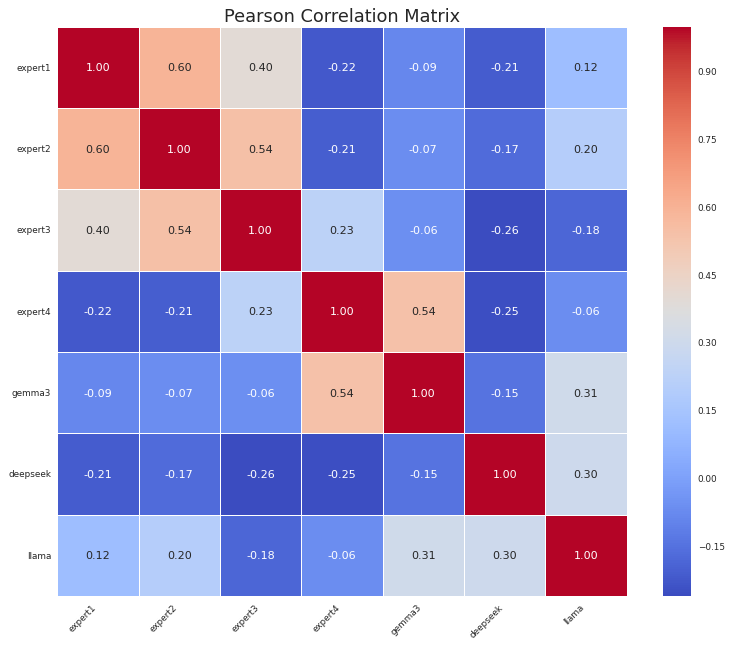

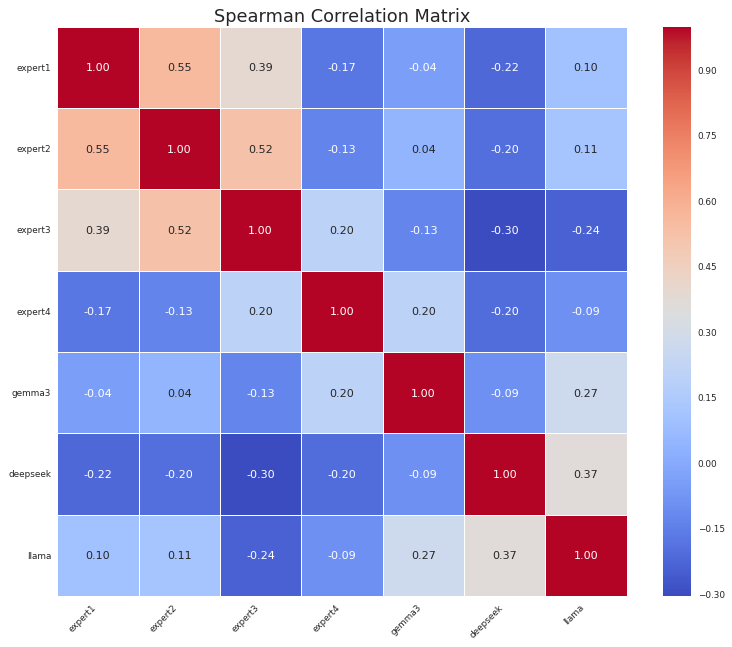

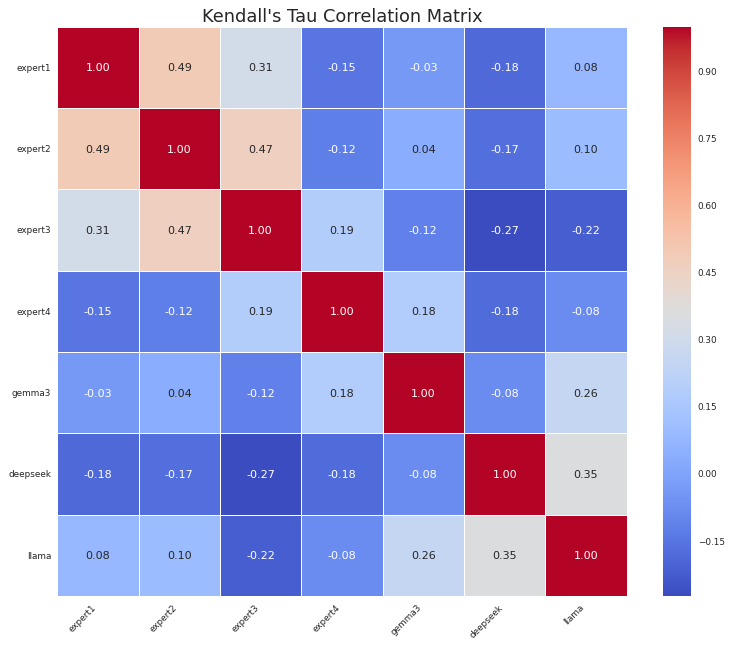

Correlation matrix visualizations (Pearson, Spearman, and Kendall's Tau) generated!


In [55]:
correlations_heatmap(df2,"26scores_heatmap")